In [2]:
!pip install plotly 
#!pip install biokit
!pip install biokit=="0.4.2"

In [3]:
#importando bibliotecas que usaremos 

import plotly.graph_objects as go
import pandas as pd
import numpy as np
from biokit.viz import corrplot
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
#bucando arquivo em um site 
caminho_arquivo = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'
#alocando o arquivo em um dataframe
df = pd.read_csv(caminho_arquivo)

In [5]:
#explorando arquivo
print("O dado possui ", df.shape[0], "Amostras e ",df.shape[1], "Atributos")

#visualizado os 5 primeiros registros 
df.head()

O dado possui  178 Amostras e  14 Atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
#renomeando as collunas  do DataFrame
df = df.rename(columns = {'Alcohol':'Alcool',' Ash':'Po','Ash_Alcanity':'Alcalinidade_po'
                        ,  'Magnesium' : 'Magnesio','Color_Intensity':'Intesidade_de_color'})

In [7]:
df.head()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [8]:
# bucando informações do data set 
df.describe()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [9]:
#criando uma table de correlação 
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intesidade_de_color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


H:\Estudos\Anaconda3\envs\Alura\lib\site-packages\biokit\viz\linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


AttributeError: 'Colorbar' object has no attribute 'set_clim'

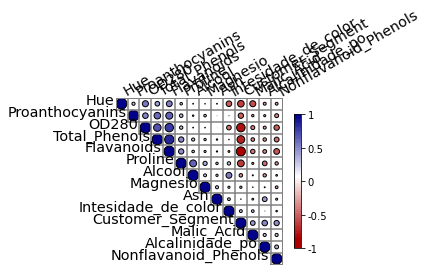

In [10]:
#Plotando um em um grafico a correlaçção entre objetos 

corr_graf =  corrplot.Corrplot(matriz_corr)
corr_graf.plot (upper = 'circle', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [12]:
#normalização 

#a normalização é uma tecnica de escala na qual os valores são deslocados e redimensionados para que fiquem entre 0 e 1. 
#também é conhecida como escala min-max

# o min sempre sera 0
# o max sempre sera 1 

#tiremos o inviezamento dos dados 
atributos = df.columns 
for atributo in atributos:
    df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo])-min(df[atributo]))

In [13]:
df.head()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [15]:
# Esse “MinMaxScaler”, quando nós utilizarmos o método “fit” que significa basicamente que nós pegaremos o nosso dado e 
# passaremos para essa função e ela colocará entre 0 e 1, ele vai retornar para nós um NumPy array, que é o nome do 
# nosso NumPy array. “np.df = min_max_scaler.fit_transform”, nós vamos passar para ela como entrada o nosso DataFrame.

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)


In [16]:
# pegando o nome das colunas 
colunas = df.columns 

#Agora como nós temos o NumPy array, nós devemos transformar isso para o nosso Pandas DataFrames
df = pd.DataFrame(np_df, columns = colunas )


In [17]:
#vendo o resultado 
df.describe()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Tirando a normalização e deixando como os dados origeinais eram

np_df = min_max_scaler.inverse_transform(df)

In [20]:
# pegando o arrey e criando um Darafreme 
df = pd.DataFrame(np_df,columns = colunas)
df.describe()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#fase de clusterização dos dados
#introdução ao kmeans
from sklearn.cluster import KMeans

In [30]:
# Esse agrupador recebe como argumento para ele, o número de clusters.

#Para realizar o primeiro agrupamento de teste, devemos instanciar um agrupador e aplicá-lo nos nossos dados, fazendo:

agrupador3 = KMeans(n_clusters = 3)
agrupador3.fit(df)

KMeans(n_clusters=3)

In [31]:
agrupador4 = KMeans(n_clusters = 4)
agrupador4.fit(df)

KMeans(n_clusters=4)

In [32]:
#“labels” é o nome que as pessoas dão para o nome dos grupos. 
#Por exemplo: grupo 1, grupo 2, grupo 3 e grupo 4, que são as etiquetas, como os nossos grupos 
#foram etiquetados ou como eles foram separados.

#Para visualizar os rótulos da nossa clusterização, ou seja, visualizar como ela foi realizada, podemos fazer:
labels = agrupador3.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
labels = agrupador4.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 2 3 3 3 2 3 2 3 3 3
 3 2 3 2 3 3 3 3 2 2 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 2 2 2 3 3 3
 3 2 2 2 2 3 3 2 3 3 3 3 3 3 3 3 2 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#criando um grafico 
#nós iremos criar uma “fig” através do “go.figure”. Esse “go” aqui significa “graph objects”, ou seja, “objetos gráficos”.
#nós iremos adicionar um traço  “fig.add_trace(go.Scatter)”. Esse “Scatter” é aquele gráfico com as bolinhas

#No eixo “x” eu vou colocar o nosso atributo intensidade de cor.
#No eixo “y” eu vou colocar o álcool

#mode = 'markers',
#“dict”, um dicionário no qual nós iremos selecionar a cor da nossa bolinha de acordo com o label que ela foi selecionada, ou seja, o grupo que ela foi colocada.


In [35]:
#Para visualizar os 4 clústeres em 2 dimensões, devemos iniciar instanciando uma figura e adicionando nela a forma que queremos desenhar:
fig = go.Figure()
#Podemos adicionar um traçado:
fig.add_trace(go.Scatter(x = df['Intesidade_de_color'], y = df['Alcool'],
                        mode = 'markers',
                        marker = dict(color =  agrupador3.labels_.astype(np.float64)),
                        text = labels))
#E, então, mostrar a figura:
fig.show()

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intesidade_de_color'], y = df['Alcool'],
                        mode = 'markers',
                        marker = dict(color =  agrupador4.labels_.astype(np.float64)),
                        text = labels))
fig.show()

In [54]:
#Para visualizar os 3 clústeres em 3 dimensões, utilizaremos uma função do plotly chamado scatter3d, 
#que desenha um gráfico de três dimensões:

fig = go.Figure()
fig.add_trace(go.Scatter3d(  x = df['Intesidade_de_color'],
                             y = df['Alcool'],
                             z = df['Proline'],
                        mode = 'markers',
                        marker = dict(color = labels.astype(np.float64)),
                        text = labels))

# Podemos adicionar o nome dos eixos ao nosso gráfico, de modo que fique mais claro de entender o que está sendo 
# representado nele. Para fazer isso, podemos utilizar a propriedade axis dos layouts. 
# Iremos então atualizar o layout (update_layout). Alteraremos o atributo scene passando para ele 
# um dicionário com o nome dos eixos. Depois disso, atualizaremos a figura usando fig.show():

fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Alcool',
    zaxis_title = 'Proline'
))

fig.show()

In [53]:
# O centro dos clusters
#Podemos adicionar os centros dos clústeres. Eles nos dão uma boa visão de como o centro de um cluster, 
#ou seja, o centro daquele grupo está disposto. Para isso, podemos fazer:

centros = pd.DataFrame(agrupador3.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
0,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
1,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
2,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333


In [47]:
# O centro dos clusters
centros = pd.DataFrame(agrupador4.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Ash,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intesidade_de_color,Hue,OD280,Proline,Customer_Segment
0,0.558882,0.512599,0.575980,0.557560,0.318614,0.240948,0.093135,0.599057,0.234556,0.521864,0.164804,0.151480,0.250996,1.000000e+00
1,0.714407,0.251122,0.585879,0.331819,0.394989,0.641438,0.557463,0.301887,0.469818,0.362483,0.473198,0.691501,0.597512,-6.661338e-16
2,0.311667,0.217523,0.485918,0.495704,0.214130,0.313793,0.266878,0.623270,0.266667,0.148521,0.483089,0.431258,0.173942,5.000000e-01
3,0.341014,0.249012,0.463806,0.497611,0.305408,0.534062,0.440722,0.307409,0.471493,0.158266,0.457862,0.645671,0.171027,5.000000e-01


In [50]:
fig.add_trace(go.Scatter3d(x = centros['Intesidade_de_color'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                          mode = 'markers',
                          marker = dict (color = 'red'),
                          text  = [0,1,2]))
fig.show()

In [ ]:
#Quanto maior for o número de grupos k, mais detalhes poderão ser percebidos no agrupamento.
#É sempre uma boa prática começar com uma quantidade pequena de clústeres, 
#avaliando com conhecimento especialista se o agrupamento faz sentido.
#Começando com uma quantidade pequena de clústeres é possível avaliar melhor os resultados de cada um, 
#permitindo inferir se existe ou não a necessidade de se aumentar o número de grupos.
#O método k-means se baseia na realização de médias realizadas para k grupos ou clústeres.
#O método k-means se baseia na realização de médias para definição dos centros de k grupos.

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.   0.   1.5 27.   4.  14.  38.   0.7 10.   1.   4.  16.  12. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#padronização 

#A padronização é outra tecnica de dirensionamento em que os valores sao centralizados em torno da media 
#com um descio padrao de unidade.
#Isso significa que a media do atributo torna-se zero ea distribuição resultante tem um desvio padrao de uniadade. 

# a media sempre sera 0
#DS sempre sera 1 

#normalização 

#a normalização é uma tecnica de escala na qual os valores são deslocados e redimensionados para que fiquem entre 0 e 1. 
#também é conhecida como escala min-max

# o min sempre sera 0
# o max sempre sera 1 

#A grande questao = normalizar ou padronizar?

#A normalização

# A normalização é boa para usar quando vc sabe que a distribuilçao ed seus dados não segue uma distribuilçao gaussiana.
# isso pode ser ultil em algoritimos que nao assumem nunguema distribuiçlão ed dados como Kvizinhos 
# mais proximos e redes neurais.

#A padroniozação

# A padroniozação, por outro lado, pode ser útil nos caos em que os dados seguem uma distribuição gaussiana.
# no entento, isso nao precisa ser necessariamente verdade. alem disso, ao contrário da normalização,a padronização 
# não tem um intervalo delimitador. portanto, mesmoq eu você tenha valores discrepantes em seus dados 
# eles nao serão afetados pela padronização.

# obs: a padronização é mais sensivel a outliers 
    